# MA 592 Project

## Import Data


In [2]:
from scipy.io import mmread
# Read Count Matrix data and names
counts_mat = mmread("./CD14_mtxs/CD14_counts.mtx").todense()
with open("./CD14_mtxs/CD14_c_colnames.txt", 'r') as f:
    counts_rownames = [x[:-1] for x in f.readlines()]
with open("./CD14_mtxs/CD14_c_rownames.txt", 'r') as f:
    counts_colnames = [x[:-1] for x in f.readlines()]

# Read Pertubation Matrix data and names
pert_mat = mmread("./CD14_mtxs/CD14_perturbations.mtx").todense()
with open("./CD14_mtxs/CD14_p_colnames.txt", 'r') as f:
    pert_rownames = [x[:-1] for x in f.readlines()]
with open("./CD14_mtxs/CD14_p_rownames.txt", 'r') as f:
    pert_colnames = [x[:-1] for x in f.readlines()]


## Basic Read Value Info

In [2]:
print("Counts Matrix Info")
print("Counts Matrix Shape: ", counts_mat.shape)
print("Counts Col Names: ", counts_colnames)
print("Counts Row Names: ", counts_rownames)

print("\nPertubations Matrix Info")
print("Pertubations Matrix Shape: ", pert_mat.shape)
print("Pertubation Col Names: ", pert_colnames)
print("Pertubation Row Names: ", pert_rownames)

Counts Matrix Info
Counts Matrix Shape:  (310, 6204)
Counts Col Names:  ['CDK11B', 'CDK11A', 'CDA', 'CDC42', 'CD52', 'CDCA8', 'CDC20', 'CDKN2C', 'CDC7', 'CDC14A', 'CD53', 'CD58', 'CD101', 'CD160', 'CDC42SE1', 'CD1D', 'CD1A', 'CD1C', 'CD1B', 'CD1E', 'CD84', 'CD48', 'CD244', 'CDC73', 'CDK18', 'CD55', 'CD46', 'CD34', 'CDC42BPA', 'CDC42EP3', 'CDKL4', 'CD302', 'CDCA7', 'CDCP1', 'CDC25A', 'CD47', 'CD96', 'CD200R1L', 'CD80', 'CD86', 'CDV3', 'CD38', 'CDS1', 'CDKN2AIP', 'CD180', 'CDK7', 'CDC42SE2', 'CDKL3', 'CDKN2AIPNL', 'CDC23', 'CDC25C', 'CD14', 'CD74', 'CDYL', 'CD83', 'CDKAL1', 'CDKN1A', 'CDC5L', 'CD2AP', 'CD109', 'CD24', 'CD164', 'CDC40', 'CDK19', 'CDCA7L', 'CDK13', 'CD36', 'CDK14', 'CDK6', 'CDHR3', 'CDK5', 'CD99', 'CDKL5', 'CDK16', 'CD99L2', 'CDCA2', 'CDC37L1-DT', 'CDC37L1', 'CD274', 'CD72', 'CDK20', 'CDC14B', 'CDC26', 'CDK5RAP2', 'CDK9', 'CD151', 'CD81-AS1', 'CD81', 'CDKN1C', 'CD59', 'CD44', 'CD44-AS1', 'CD82', 'CD6', 'CDCA5', 'CDC42EP2', 'CDK2AP2', 'CD3D', 'CD3G', 'CDON', 'CDC123', 'CDNF

## Conversion to Pandas Dataframe

In [3]:
import numpy as np
import pandas as pd

# Make Counts Dataframe
counts_df = pd.DataFrame(data=counts_mat.transpose(), columns=counts_colnames)
# Insert proteins by rowname as first column
counts_df.insert(loc=0, column="Cell", value=counts_rownames)

# Same process for perturbations
pert_df = pd.DataFrame(data=pert_mat.transpose(), columns=pert_colnames)
pert_df.insert(loc=0, column="Cell", value=pert_rownames)

In [4]:
print(pert_df.shape)
print(list(pert_df.columns))

# Number of cells where each gene is knocked out
print(pert_df.sum(numeric_only=True, axis=0))

# Number of cells with 1,2 or 3 knockouts
print(pert_df.sum(numeric_only=True, axis=1).value_counts())

(6204, 48)
['Cell', 'AKT1', 'CD14', 'CD151', 'CD19', 'CD36', 'CD40', 'CD47', 'CDHR3', 'CDK1', 'IKBKB', 'IKBKE', 'IKBKG', 'IRF1', 'IRF2', 'IRF3', 'IRF4', 'IRF5', 'IRF7', 'IRF8', 'MAP2K1', 'MAP2K2', 'MAP2K3', 'MAP2K4', 'MAP2K6', 'MAP2K7', 'MAP3K1', 'MAP3K14', 'MAP3K14-AS1', 'MAP3K7', 'MAP3K8', 'MAPK1', 'MAPK14', 'MAPK3', 'MAPK7', 'MAPK8', 'MAPKAPK2', 'NFKB1', 'NFKB2', 'NFKBIA', 'NFKBIB', 'NFKBIE', 'NFKBIZ', 'TBK1', 'TRAF2', 'TRAF3', 'TRAF6', 'TRAPPC9']
AKT1           148.0
CD14           188.0
CD151          139.0
CD19           111.0
CD36           114.0
CD40           134.0
CD47           116.0
CDHR3          127.0
CDK1            19.0
IKBKB          129.0
IKBKE          163.0
IKBKG           81.0
IRF1           140.0
IRF2           147.0
IRF3           146.0
IRF4           127.0
IRF5           156.0
IRF7           159.0
IRF8            74.0
MAP2K1         183.0
MAP2K2         114.0
MAP2K3         142.0
MAP2K4         130.0
MAP2K6         174.0
MAP2K7         165.0
MAP3K1         155.0

In [57]:
print(counts_df.shape)
print(list(counts_df.columns))

# Number of cells where protein is expressed
print(counts_df.astype(bool).sum(axis=0))

# Number of cells with a particular count of proteins expressed (56-140)
print(counts_df.astype(bool).sum(axis=1).value_counts(sort=True))

(6204, 311)
['Cell', 'CDK11B', 'CDK11A', 'CDA', 'CDC42', 'CD52', 'CDCA8', 'CDC20', 'CDKN2C', 'CDC7', 'CDC14A', 'CD53', 'CD58', 'CD101', 'CD160', 'CDC42SE1', 'CD1D', 'CD1A', 'CD1C', 'CD1B', 'CD1E', 'CD84', 'CD48', 'CD244', 'CDC73', 'CDK18', 'CD55', 'CD46', 'CD34', 'CDC42BPA', 'CDC42EP3', 'CDKL4', 'CD302', 'CDCA7', 'CDCP1', 'CDC25A', 'CD47', 'CD96', 'CD200R1L', 'CD80', 'CD86', 'CDV3', 'CD38', 'CDS1', 'CDKN2AIP', 'CD180', 'CDK7', 'CDC42SE2', 'CDKL3', 'CDKN2AIPNL', 'CDC23', 'CDC25C', 'CD14', 'CD74', 'CDYL', 'CD83', 'CDKAL1', 'CDKN1A', 'CDC5L', 'CD2AP', 'CD109', 'CD24', 'CD164', 'CDC40', 'CDK19', 'CDCA7L', 'CDK13', 'CD36', 'CDK14', 'CDK6', 'CDHR3', 'CDK5', 'CD99', 'CDKL5', 'CDK16', 'CD99L2', 'CDCA2', 'CDC37L1-DT', 'CDC37L1', 'CD274', 'CD72', 'CDK20', 'CDC14B', 'CDC26', 'CDK5RAP2', 'CDK9', 'CD151', 'CD81-AS1', 'CD81', 'CDKN1C', 'CD59', 'CD44', 'CD44-AS1', 'CD82', 'CD6', 'CDCA5', 'CDC42EP2', 'CDK2AP2', 'CD3D', 'CD3G', 'CDON', 'CDC123', 'CDNF', 'CDK1', 'CDH23', 'CD9', 'CD4', 'CDCA3', 'CD163L1'

In [73]:
from sklearn.linear_model import LinearRegression

# reg = 
reg = LinearRegression().fit(pert_df[["CD14"]], counts_df["CD14"])
reg2 = LinearRegression().fit(pert_df.drop(columns=["Cell"]), counts_df["CD14"])

nonzero = counts_df["CD14"] != 0
# knockout = pert_df["CD14"] == 0
# reg3 = LinearRegression().fit(pert_df.drop(columns=["Cell"]).loc[knockout], counts_df.loc[knockout]["CD14"])
# print(reg.coef_[0])
reg3 = LinearRegression().fit(pert_df.loc[nonzero][["CD14"]], counts_df.loc[nonzero]["CD14"])
print(reg3.coef_[0])
# np.set_printoptions(suppress=True,
#    formatter={'float_kind':'{:0.3f}'.format})
# print(np.stack([np.arange(0, len(reg2.coef_)), reg2.coef_, reg3.coef_], axis=1))

0.2944798415163058


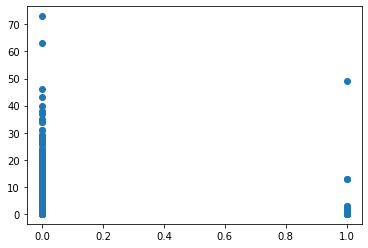

In [38]:
import matplotlib.pyplot as plt
plt.scatter(pert_df["CD14"], counts_df["CD14"])
plt.show()

In [ ]:
print(counts_df.loc[pert_df["CD14"] == 1]["CD14"])

[-0.270] 0.786070478723404


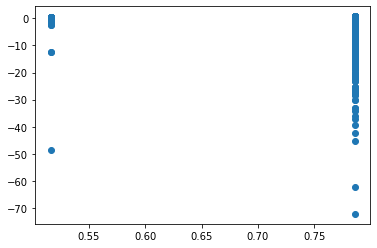

In [78]:
reg = LinearRegression().fit(pert_df[["CD14"]], counts_df["CD14"])
print(reg.coef_, reg.intercept_)
prediction = reg.predict(pert_df[["CD14"]])
residual = (prediction - counts_df["CD14"])
plt.scatter(prediction, residual)

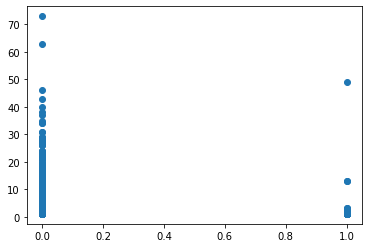

In [61]:
plt.scatter(pert_df.loc[nonzero]["CD14"], counts_df.loc[nonzero]["CD14"])

In [45]:
pert_df.columns[-1]

'TRAPPC9'

In [7]:
import numpy as np
counts_df["CD14log"] = np.log(counts_df["CD14"]+1)

<AxesSubplot:>

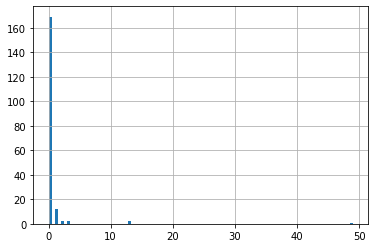

In [15]:
knockout = pert_df["CD14"].astype(bool)
# print(counts_df.loc[knockout]["CD14log"].value_counts(normalize=True).to_dict())
counts_df.loc[knockout]["CD14"].hist(bins=100)

<AxesSubplot:>

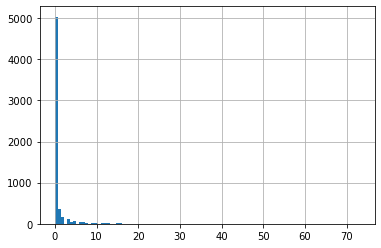

In [16]:
# print(counts_df.loc[~knockout]["CD14log"].value_counts(normalize=True).to_dict())
counts_df.loc[~knockout]["CD14"].hist(bins=100)

In [28]:
counts_df.drop(columns=["Cell"]).stack().value_counts(normalize=True).to_dict()

{0.0: 0.8011110972902038,
 1.0: 0.10965801546974155,
 2.0: 0.03580565178362264,
 3.0: 0.01623058248904866,
 4.0: 0.009288686274387855,
 5.0: 0.005898072190745106,
 6.0: 0.004046243373738756,
 7.0: 0.003038180947464658,
 8.0: 0.0023032542017285807,
 9.0: 0.001789634734151393,
 10.0: 0.001411805680807528,
 11.0: 0.0011630293493876992,
 12.0: 0.0010401960357491588,
 13.0: 0.0008240715978281826,
 14.0: 0.000705902840403764,
 15.0: 0.0006032826036930847,
 16.0: 0.0005250217161005969,
 17.0: 0.0004534985208173961,
 18.0: 0.0003949324261289781,
 19.0: 0.0003270372190123165,
 20.0: 0.0002850562130852204,
 21.0: 0.00027883680479972466,
 22.0: 0.00023011810656334156,
 23.0: 0.00021664272194476752,
 24.0: 0.00019746621306448905,
 0.6931471805599453: 0.0001953930769693238,
 25.0: 0.0001528937870184364,
 26.0: 0.00015082065092327117,
 27.0: 0.00013423556216194925,
 28.0: 0.00011194934913892293,
 29.0: 9.018142013968791e-05,
 30.0: 8.862656806831397e-05,
 1.0986122886681098: 8.137059173523564e-05,
 

# Implementation

In [6]:
# NFKB1 --> CD69
import matplotlib.pyplot as plt

def getFHat(x, n=None):
    f = x.value_counts().sort_index()
    if n is None:
        n = f.index.max()
    return f.reindex(range(n+1), fill_value=0).cumsum() / f.sum()

def IV(Z, X, Y, d=0.25):
    X0, X1 = X.loc[Z == 0], X.loc[Z == 1]
    Y0, Y1 = Y.loc[Z == 0], Y.loc[Z == 1]

    N = X.max()
    FX0, FX1 = getFHat(X0, N), getFHat(X1, N)
    FY0, FY1 = getFHat(Y0, N), getFHat(Y1, N)
    alpha = ((FX1-FX0) / (1+pd.Series(range(N+1)))**d).argmax()
    beta = ((FY1-FY0) / (1+pd.Series(range(N+1)))**d).argmax()

    A0, A1 = (X0 > alpha).astype(int), (X1 > alpha).astype(int)
    B0, B1 = (Y0 > beta).astype(int), (Y1 > beta).astype(int)

    LATE = (B0.mean()-B1.mean()) / (A0.mean()-A1.mean())
#     LATE = (Y0.mean()-Y1.mean()) / (A0.mean()-A1.mean())
#     print(B0.mean()-B1.mean(), A0.mean()-A1.mean(), LATE)
    return LATE

print(IV(pert_df["NFKB1"], counts_df["NFKB1"], counts_df["CD14"]))

0.2533244204645833
1.0
